
Web Scrapping Falabella


In [1]:
#Librerías necesarias
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import csv

In [ ]:

# Configuración para Selenium
chrome_options = Options()
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--headless")  # Ejecutar en modo headless
chrome_options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"
)
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option("useAutomationExtension", False)

# Ruta del driver
driver_path = 'D:\\Proyecto Web Scrapping\\chromedriver.exe'  # Cambia esta ruta si es necesario
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Lista de productos (enlaces y modelos)
productos = [
    # Xiaomi
    ("https://www.falabella.com.co/falabella-co/product/127913189/Celular-Xiaomi-Poco-X6-Pro-5G-512Gb-12Ram-64Mp-Negro/127913190", "Xiaomi", "Xiaomi Poco X6 Pro 5G 512Gb 12Ram 64Mp"),
    ("https://www.falabella.com.co/falabella-co/product/127913775/Celular-Xiaomi-Poco-X6-Pro-5G-512Gb-12Ram-64Mp-Amarillo/127913776", "Xiaomi", "Xiaomi Poco X6 Pro 5G 512Gb 12Ram 64Mp"),
    ("https://www.falabella.com.co/falabella-co/product/127916553/Celular-Xiaomi-Redmi-Note-13-Pro-Plus-5G-512Gb-12Ram-200Mp-Negro/127916554", "Xiaomi", "Xiaomi Redmi Note 13 Pro Plus 5G 512Gb 12Ram 200Mp"),
    ("https://www.falabella.com.co/falabella-co/product/128104744/Celular-Xiaomi-Redmi-Note-13-PRO-PLUS-5G-512GB-12GB-RAM-Negro/128104745", "Xiaomi", "Xiaomi Redmi Note 13 Pro Plus 5G 512Gb 12Ram 200Mp"),
    ("https://www.falabella.com.co/falabella-co/product/130055074/Celular-Xiaomi-Redmi-Note-13-Pro-Plus-5g-512gb-12ram-PURPURA/130055075", "Xiaomi", "Xiaomi Redmi Note 13 Pro Plus 5G 512Gb 12Ram 200Mp"),
    ("https://www.falabella.com.co/falabella-co/product/127687136/CELULAR-XIAOMI-REDMI-13C-256GB-8GB-RAM-NEGRO/127687137", "Xiaomi", "XIAOMI REDMI 13C 256GB 8GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/128261646/Celular-Xiaomi-Redmi-13C-256GB-8RAM-Negro/128261647", "Xiaomi", "XIAOMI REDMI 13C 256GB 8GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/128128076/Xiaomi-Redmi-Note-13-Pro-4g-256gb-8gb-Ram-Negro/128128077", "Xiaomi", "Xiaomi Redmi Note 13 Pro 4g 256gb 8gb Ram"),
    ("https://www.falabella.com.co/falabella-co/product/128807587/Xiaomi-Redmi-Note-13-Pro-4g-256gb-8gb-Ram-Purpura/128807589", "Xiaomi", "Xiaomi Redmi Note 13 Pro 4g 256gb 8gb Ram"),
    ("https://www.falabella.com.co/falabella-co/product/prod13530339/Celular-Xiaomi-Redmi-Note-13-Pro-256GB-8GB-Camara-Posterior-200MP+8MP+2MP-Camara-Frontal-16MP-Pantalla-6.67-Pulgadas/72853341", "Xiaomi", "Xiaomi Redmi Note 13 Pro 4g 256gb 8gb Ram"),
    ("https://www.falabella.com.co/falabella-co/product/128128195/Xiaomi-Redmi-Note-13-Pro-4g-256gb-8gb-Ram-Forest-Green/128128196", "Xiaomi", "Xiaomi Redmi Note 13 Pro 4g 256gb 8gb Ram"),
    ("https://www.falabella.com.co/falabella-co/product/128931528/Celular-Xiaomi-Redmi-Note-13-8GB-256GB-Negro/128931529", "Xiaomi", "Xiaomi Redmi Note 13 8GB 256GB"),
    ("https://www.falabella.com.co/falabella-co/product/127891485/Celular-Xiaomi-Redmi-Note-13-256GB-8GB-RAM-Negro/127891486", "Xiaomi", "Xiaomi Redmi Note 13 8GB 256GB"),
    
    # Samsung
    ("https://www.falabella.com.co/falabella-co/product/129586393/CELULAR-SAMSUNG-GALAXY-A55-5G-256GB-8-RAM-AZUL-NAVY/129586394", "Samsung", "SAMSUNG GALAXY A55"),
    ("https://www.falabella.com.co/falabella-co/product/129554425/Celular-Samsung-Galaxy-A55-5G-256Gb-8Ram-Azul-Oscuro/129554428", "Samsung", "SAMSUNG GALAXY A55"),
    ("https://www.falabella.com.co/falabella-co/product/prod13530496/Celular-Samsung-A15-256GB-8GB-RAM-Camara-Posterior-50-MP-Camara-Frontal-12MP-Pantalla-6.5-Pulgadas-+-MediaTek-MT6789V-CD-/72854633", "Samsung", "Samsung A15 256GB"),
    ("https://www.falabella.com.co/falabella-co/product/132236410/CELULAR-SAMSUNG-GALAXY-A15-8+256GB-AZUL-NEGRO/132236411", "Samsung", "Samsung A15 256GB"),
    ("https://www.falabella.com.co/falabella-co/product/128004219/CELULAR-SAMSUNG-GALAXY-A15-256GB-8-RAM-NEGRO-(Blue-Black)/128004220", "Samsung", "Samsung A15 256GB"),
    ("https://www.falabella.com.co/falabella-co/product/132236494/CELULAR-SAMSUNG-GALAXY-A15-8+256GB-AZUL/132236495", "Samsung", "Samsung A15 256GB"),
    ("https://www.falabella.com.co/falabella-co/product/128906319/Celular-Samsung-Galaxy-A25-5G-256GB-8RAM+-Cargador/128906321", "Samsung", "Samsung Galaxy A25 5G 256GB 8RAM"),
    ("https://www.falabella.com.co/falabella-co/product/131931272/Celular-SAMSUNG-GALAXY-A25-256GB-+-8-RAM-AZUL-CLARO/131931273", "Samsung", "Samsung Galaxy A25 5G 256GB 8RAM"),
    ("https://www.falabella.com.co/falabella-co/product/72899217/Celular-Samsung-Galaxy-A35-5G-256GB-8GB-RAM-camara-posterior-50-MP-camara-frontal-13MP-pantalla-6.6-Pulgadas-+-Exynos-1380/72899217", "Samsung", "Samsung Galaxy A35 5G 256GB 8GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/133744591/Celular-Samsung-Galaxy-A35-256Gb-5g-Lila/133744592", "Samsung", "Samsung Galaxy A35 5G 256GB 8GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/128668464/Celular-Samsung-Galaxy-A05S-128Gb-Negro/128668465", "Samsung", "Samsung Galaxy A05S 128Gb"),
    ("https://www.falabella.com.co/falabella-co/product/128035979/Samsung-S24-Ultra-256GB-12GB-Violet/128035980", "Samsung", "Samsung S24 Ultra 256GB 12GB"),
    ("https://www.falabella.com.co/falabella-co/product/128853893/Celular-Samsung-Galaxy-S24-Ultra-De-256GB12GB-RAM-Gris-5G/128853894", "Samsung", "Samsung S24 Ultra 256GB 12GB"),
    ("https://www.falabella.com.co/falabella-co/product/129574090/Samsung-Galaxy-S24-Ultra-512GB-12GB-Ram-5G-Violeta/129574091", "Samsung", "Samsung Galaxy S24 Ultra 512GB 12GB"),

    #Apple
    ("https://www.falabella.com.co/falabella-co/product/prod12000048/iPhone-13-128-GB-5G-4GB-RAM-Pantalla-6.1-Pulgadas-Chip-A15-Bionic/19604508", "Apple", "iPhone 13 128 GB 5G 4GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/prod13430667/iPhone-15-de-128GB-5G-6GB-RAM-Pantalla-6.1-pulgadas-Chip-A16-Bionic-Carga-Tipo-C-Dynamic-Island-Camara-48MP/72752105", "Apple", "iPhone 15 128GB 5G 6GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/prod13070047/iPhone-14-128GB-5G-6GB-RAM-Pantalla-6.1-Pulgadas-Chip-A15-Bionic-/60999138", "Apple", "iPhone 14 128GB 5G 6GB RAM"),
    ("https://www.falabella.com.co/falabella-co/product/prod10900027/iPhone-11-128-GB-4GB-RAM-Pantalla-6.1-Pulgadas-Chip-A13-Bionic-Camara-12-MP/9722720", "Apple", "iPhone 11 128 GB 4GB RAM"),
]

# Lista para almacenar los datos
data = []

# Iterar sobre cada producto
for url, marca, modelo in productos:
    print(f"Procesando: {modelo} ({marca})")

    # Cargar la página del producto
    driver.get(url)

    # Esperar a que se cargue el contenedor de comentarios
    try:
        wait = WebDriverWait(driver, 25)  # Aumentar si es necesario para conexiones lentas
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "div[data-testid='user-reviews-container']")))

        # Cargar todos los comentarios
        comentarios = []
        while True:
            try:
                ver_mas_btn = driver.find_element(By.ID, "more-comments-button")
                driver.execute_script("arguments[0].scrollIntoView();", ver_mas_btn)
                ver_mas_btn.click()

                # Esperar dinámicamente hasta que se carguen nuevos comentarios
                WebDriverWait(driver, 25).until(
                    lambda d: len(d.find_elements(By.CSS_SELECTOR, "div._review-text_16yc3_2")) > len(comentarios)
                )

                # Actualizar el número de comentarios cargados
                comentarios = driver.find_elements(By.CSS_SELECTOR, "div._review-text_16yc3_2")
                print(f"Comentarios cargados hasta ahora: {len(comentarios)}")  # Log de progreso

            except Exception:
                print("No hay más comentarios para cargar.")
                break

        # Extraer los comentarios y calificaciones
        reviews = driver.find_elements(By.CSS_SELECTOR, "div[data-testid='review']")
        for review in reviews:
            try:
                # Extraer el comentario
                comentario_element = review.find_element(By.CSS_SELECTOR, "div._review-text_16yc3_2")
                comentario = comentario_element.text.strip()

                # Buscar las estrellas dentro del contenedor actual
                estrellas_llenas = review.find_elements(By.CSS_SELECTOR, "span._star-full_10acl_10")
                calificacion = len(estrellas_llenas)  # Contar las estrellas llenas

                print(f"Comentario: {comentario[:30]}... | Calificación: {calificacion}")  # Log para depuración

                # Guardar en la lista
                data.append({"comentario": comentario, "calificacion": calificacion, "marca": marca, "modelo": modelo})

            except Exception as e:
                print(f"Error procesando una review: {e}")

    except Exception as e:
        print(f"Error procesando {modelo}: {e}")

# Crear un DataFrame con los resultados
df = pd.DataFrame(data)


# Exportar a CSV
df.to_csv("comentarios_productos.csv", index=False, encoding="utf-8")
print(f"Se procesaron {len(data)} comentarios en total. Archivo guardado como 'comentarios_productos.csv'.")

# Cerrar el navegador
driver.quit()


Procesando: Xiaomi Poco X6 Pro 5G 512Gb 12Ram 64Mp (Xiaomi)
Comentarios cargados hasta ahora: 7
Comentarios cargados hasta ahora: 25
Comentarios cargados hasta ahora: 33
Comentarios cargados hasta ahora: 41
Comentarios cargados hasta ahora: 47
Comentarios cargados hasta ahora: 56
Comentarios cargados hasta ahora: 57
No hay más comentarios para cargar.
Comentario: Si corresponde a la foto tiene... | Calificación: 5
Comentario: El tamaño es el apropiado y pa... | Calificación: 5
Comentario: Excelente teléfono con su fund... | Calificación: 5
Comentario: El producto es excelente, lleg... | Calificación: 5
Comentario: Cumplio con mis expectativas. ... | Calificación: 5
Comentario: Es excelente, es igual al de l... | Calificación: 5
Comentario: El producto es excelente, lleg... | Calificación: 5
Comentario: Cumplio con mis expectativas. ... | Calificación: 5
Comentario: Es excelente, es igual al de l... | Calificación: 5
Comentario: Muy bien... | Calificación: 5
Comentario: Excelente calida

In [33]:
df.groupby(['marca', 'modelo']).size()

marca    modelo                                            
Apple    iPhone 11 128 GB 4GB RAM                              1570
         iPhone 13 128 GB 5G 4GB RAM                            321
         iPhone 14 128GB 5G 6GB RAM                             567
         iPhone 15 128GB 5G 6GB RAM                             172
Samsung  SAMSUNG GALAXY A55                                     641
         Samsung A15 256GB                                      528
         Samsung Galaxy A05S 128Gb                               15
         Samsung Galaxy A25 5G 256GB 8RAM                       238
         Samsung Galaxy A35 5G 256GB 8GB RAM                    295
         Samsung Galaxy S24 Ultra 512GB 12GB                    211
         Samsung S24 Ultra 256GB 12GB                          1348
Xiaomi   XIAOMI REDMI 13C 256GB 8GB RAM                          99
         Xiaomi Poco X6 Pro 5G 512Gb 12Ram 64Mp                 136
         Xiaomi Redmi Note 13 8GB 256GB                 

Análisis de Sentimientos

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("d:\Proyecto Web Scrapping\Analisis de Sentimientos\comentarios_producto_fake.csv")
print(df.info())  # Resumen del DataFrame
print(df['calificacion'].value_counts())  # Distribución de calificaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    6822 non-null   object
 1   calificacion  6822 non-null   int64 
 2   marca         6822 non-null   object
 3   modelo        6822 non-null   object
dtypes: int64(1), object(3)
memory usage: 213.3+ KB
None
calificacion
5    5904
4     589
3     166
1     110
2      53
Name: count, dtype: int64


In [ ]:
# Install missing packages
%pip install nltk
%pip install symspellpy

import re
# Install missing packages
%pip install nltk
%pip install symspellpy

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from symspellpy.symspellpy import SymSpell, Verbosity
import json


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [33]:
#Crear dataframe
df = pd.read_csv("d:\Proyecto Web Scrapping\Analisis de Sentimientos\comentarios_producto_fake.csv")
print(df.info())  # Resumen del DataFrame
print(df['calificacion'].value_counts())  # Distribución de calificaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    6822 non-null   object
 1   calificacion  6822 non-null   int64 
 2   marca         6822 non-null   object
 3   modelo        6822 non-null   object
dtypes: int64(1), object(3)
memory usage: 213.3+ KB
None
calificacion
5    5904
4     589
3     166
1     110
2      53
Name: count, dtype: int64


Limpieza básica

In [ ]:

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Configurar stopwords y lematización
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

# Stopwords personalizadas
important_negatives = {"no", "nunca", "sin", "muy", "poco", "bastante"}
stop_words = stop_words - important_negatives

# # Función para eliminar tildes

def remove_accents(text):
    # Diccionario de reemplazo
    accents = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'
    }
    # Reemplazar cada carácter
    for accented_char, unaccented_char in accents.items():
        text = text.replace(accented_char, unaccented_char)
    return text

# Función de limpieza
def clean_text(text):
    # text = remove_accents(text)  # Eliminar tildes
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\s+', ' ', text)  # Quitar espacios extra
    text = re.sub(r'\d+', '', text)  # Eliminar números
    tokens = word_tokenize(text.lower())  # Tokenizar y pasar a minúsculas
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Aplicar limpieza
df['comentario_limpio'] = df['comentario'].apply(clean_text)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Correcciones ortográficas

In [ ]:
#crear un archivo Diccionario en .txt a partir de diccionario_espanol.json con una palabra por linea
# Ruta al archivo JSON
json_path = r"D:\Proyecto Web Scrapping\Analisis de Sentimientos\diccionario_espanol.json"
txt_path = r"D:\Proyecto Web Scrapping\Analisis de Sentimientos\diccionario_espanol.txt"

# Cargar archivo JSON
with open(json_path, "r", encoding="utf-8") as infile:
    data = json.load(infile)

# Guardar como archivo de texto
with open(txt_path, "w", encoding="utf-8") as outfile:
    for palabra in data:
        outfile.write(f"{palabra} 1\n")  # Asignar una frecuencia predeterminada de 1

In [56]:

# Configurar SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "d:\Proyecto Web Scrapping\Analisis de Sentimientos\diccionario_espanol.txt"  # Asegúrate de tener un diccionario en español
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Función para corregir texto preservando palabras con "ñ"
def correct_spelling_preserve_ñ(text):
    tokens = text.split()
    corrected_tokens = []
    for token in tokens:
        if "ñ" in token:  # No corregir palabras con "ñ"
            corrected_tokens.append(token)
        else:
            # Aplicar SymSpell para otras palabras
            suggestions = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2)
            if suggestions:
                corrected_tokens.append(suggestions[0].term)
            else:
                corrected_tokens.append(token)  # Conservar palabra original si no hay sugerencias
    return ' '.join(corrected_tokens)

# Aplicar corrección al DataFrame
df['comentario_corregido'] = df['comentario_limpio'].apply(correct_spelling_preserve_ñ)

In [57]:
print(df[['comentario_limpio', 'comentario_corregido']].sample(5))

                                      comentario_limpio  \
103                                corresponde producto   
2649  mejor camara permite capturar momentos mayor c...   
2348  compre equipo hace poco no tenia mucha fe debi...   
2333  compre telefono me pasado funcionado muy bien ...   
756   no trae snapdragon trae snapdragon deben corre...   

                                   comentario_corregido  
103                                corresponde producto  
2649  mejor camara permite capturar momentos mayor c...  
2348  compre equipo hace poco no tenia mucha fe debi...  
2333  compre telefono me pasado funcionado muy bien ...  
756   no trae snapdragon trae snapdragon deben corre...  


In [59]:
# Identificar comentarios donde se realizaron correcciones
cambios = df['comentario_limpio'] != df['comentario_corregido']

# Mostrar el número total de correcciones realizadas
print(f"Total de comentarios corregidos: {cambios.sum()}")

# Listar ejemplos de correcciones
if cambios.any():
    print("\nEjemplos de correcciones:")
    correcciones = df.loc[cambios, ['comentario_limpio', 'comentario_corregido']].head(10)
    print(correcciones)
else:
    print("No se realizaron correcciones.")



Total de comentarios corregidos: 2781

Ejemplos de correcciones:
                                    comentario_limpio  \
1   tamaño apropiado cargar facilmente calidad ima...   
2   excelente telefono funda cargador telefono muy...   
5   excelente igual foto porsupuesto gran calidad ...   
8   excelente igual foto porsupuesto gran calidad ...   
19                                   exelente calidad   
21  equipo salio dañado encendi inicie configuraci...   
23                identico d foto funciona super bien   
36  justo comore llego tiempo acordado entrega sel...   
37  producto muy bueno no perfecto hora jugar bate...   
48  telefono versatil muchas opciones personalizac...   

                                 comentario_corregido  
1   tamaño apropiado cargar facilmente calidad ima...  
2   excelente telefono funda cargador telefono muy...  
5   excelente igual foto prosupuesto gran calidad ...  
8   excelente igual foto prosupuesto gran calidad ...  
19                         

In [61]:
# Función para identificar palabras corregidas
def encontrar_correcciones(original, corregido):
    if not isinstance(original, str) or not isinstance(corregido, str):
        return []  # Manejar valores nulos
    palabras_original = original.split()
    palabras_corregidas = corregido.split()
    # Identificar diferencias entre las palabras
    correcciones = [(o, c) for o, c in zip(palabras_original, palabras_corregidas) if o != c]
    return correcciones

# Crear nueva columna con las correcciones realizadas
df['correcciones'] = df.apply(lambda row: encontrar_correcciones(row['comentario_limpio'], row['comentario_corregido']), axis=1)

# Filtrar solo los comentarios con correcciones
correcciones_df = df[df['correcciones'].apply(len) > 0][['comentario', 'comentario_limpio', 'comentario_corregido', 'correcciones']]

# Mostrar ejemplos
print("Ejemplos de correcciones realizadas:")
print(correcciones_df.head(10))


Ejemplos de correcciones realizadas:
                                           comentario  \
1   El tamaño es el apropiado y para cargar fácilm...   
2   Excelente teléfono con su funda cargador un te...   
5   Es excelente, es igual al de la foto y porsupu...   
8   Es excelente, es igual al de la foto y porsupu...   
19                                   Exelente calidad   
21  El equipo me salio dañado, lo encendí, inicie ...   
23    Es idéntico al d3 la foto y funciona super bien   
36  Es justo lo que comore, llegó en el tiempo aco...   
37  Es un producto muy bueno, pero no perfecto, a ...   
48  Es un telefono versatil, con muchas opciones d...   

                                    comentario_limpio  \
1   tamaño apropiado cargar facilmente calidad ima...   
2   excelente telefono funda cargador telefono muy...   
5   excelente igual foto porsupuesto gran calidad ...   
8   excelente igual foto porsupuesto gran calidad ...   
19                                   exelente cali

In [62]:
from collections import Counter

# Extraer todas las correcciones realizadas
todas_correcciones = [correccion for correcciones in correcciones_df['correcciones'] for correccion in correcciones]

# Contar la frecuencia de cada corrección
frecuencia_correcciones = Counter(todas_correcciones)

# Crear un DataFrame con las correcciones frecuentes
frecuentes_df = pd.DataFrame(frecuencia_correcciones.items(), columns=['correccion', 'frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
frecuentes_df = frecuentes_df.sort_values(by='frecuencia', ascending=False)

# Mostrar las correcciones más frecuentes
print("Correcciones más frecuentes:")
print(frecuentes_df.head(10))


Correcciones más frecuentes:
                correccion  frecuencia
72         (trave, trasve)         838
8                (ma, ama)         551
80                 (s, as)         344
266       (iphone, impone)         246
126       (galaxy, galayo)         130
226              (ia, cia)         111
23                (q, que)          82
36                 (g, ge)          80
3    (exelente, excelente)          66
909         (apple, apale)          63


In [63]:
#Crear dataframe
df_prueba = pd.read_csv("d:\Proyecto Web Scrapping\Analisis de Sentimientos\comentarios_producto_fake.csv")
print(df_prueba.info())  # Resumen del DataFrame
print(df_prueba['calificacion'].value_counts())  # Distribución de calificaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comentario    6822 non-null   object
 1   calificacion  6822 non-null   int64 
 2   marca         6822 non-null   object
 3   modelo        6822 non-null   object
dtypes: int64(1), object(3)
memory usage: 213.3+ KB
None
calificacion
5    5904
4     589
3     166
1     110
2      53
Name: count, dtype: int64


In [75]:

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Configurar stopwords y lematización
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

# Diccionario de correcciones específicas
# Función para eliminar la frase completa
def eliminar_frase(text):
    return text.replace("(Esta reseña se ha recibido a través de una promoción.)", "")
correcciones = {
    "q": "que",
    "exelente": "excelente",
    "espectativas": "expectativas",
    "celu": "celular",
    "bno": "bueno",
    "auriculare": "auriculares",
    "cel": "celular",
    "sultra": "ultra",
    "aprox": "aproximadamente",
    "mobil": "movil",
    "amooo": "amo",
    "perfeccoon": "perfeccion",
    "camras": "camaras",
    "escojer": "escoger",
    "encamta": "encanta",
    "aser": "hacer",
    "calentarce": "calentarse",
    "parese": "parece",
    "nuy": "muy",
    "okey": "okay",
    "espetativas": "expectativas",
    "pq": "por que",
    "mut": "muy",
    "ecxelente": "excelente",
    "execelente": "excelente",
    "bna": "buena",
    "redimiento": "rendimiento",
    "qe": "que",
    "encata": "encanta",
    "sobrecalienta": "calienta",
    "buenardo": "bueno",
    "demaciado": "demasiado",
    "(Esta reseña se ha recibido a través de una promoción.)": "",
}
# Función para aplicar correcciones específicas
def aplicar_correcciones(text):
    tokens = text.split()  # Dividir el texto en palabras
    corrected_tokens = [correcciones.get(token, token) for token in tokens]  # Reemplazar si hay corrección
    return ' '.join(corrected_tokens)  # Volver a unir las palabras


# Stopwords personalizadas
important_negatives = {"no", "nunca", "sin", "muy", "poco", "bastante", "mas", "dos"}
stop_words = stop_words - important_negatives

# Función para eliminar tildes sin alterar estructura
def remove_accents(text):
    accents = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'
    }
    for accented_char, unaccented_char in accents.items():
        text = text.replace(accented_char, unaccented_char)  # Reemplazar cada carácter
    return text


# Función de limpieza completa
def clean_text_with_corrections(text):
    text = eliminar_frase(text)  # Eliminar la frase específica
    text = remove_accents(text)  # Eliminar tildes
    text = aplicar_correcciones(text)  # Aplicar correcciones específicas
    text = re.sub(r'\W', ' ', text)  # Eliminar caracteres no alfanuméricos
    text = re.sub(r'\s+', ' ', text).strip()  # Quitar espacios extra
    text = re.sub(r'\d+', '', text)  # Eliminar números
    tokens = word_tokenize(text.lower())  # Tokenizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematización y filtro
    return ' '.join(tokens)

# Aplicar al DataFrame
df_prueba['comentario_limpio'] = df_prueba['comentario'].apply(clean_text_with_corrections)

# Verificar cambios
print("Primeros comentarios limpios en el DataFrame de prueba:")
print(df_prueba[['comentario', 'comentario_limpio']].head(10))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jkbu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Primeros comentarios limpios en el DataFrame de prueba:
                                          comentario  \
0  Si corresponde a la foto tiene un excelente re...   
1  El tamaño es el apropiado y para cargar fácilm...   
2  Excelente teléfono con su funda cargador un te...   
3  El producto es excelente, llega con su respect...   
4    Cumplio con mis expectativas. Igual que la foto   
5  Es excelente, es igual al de la foto y porsupu...   
6  El producto es excelente, llega con su respect...   
7    Cumplio con mis expectativas. Igual que la foto   
8  Es excelente, es igual al de la foto y porsupu...   
9                                           Muy bien   

                                   comentario_limpio  
0  si corresponde foto excelente rendimiento capa...  
1  tamaño apropiado cargar facilmente calidad ima...  
2  excelente telefono funda cargador telefono muy...  
3  producto excelente llega respectivo estuche ca...  
4                    cumplio expectativas igual foto

Análisis Básico

Palabras más comunes:
muy: 2434
excelente: 1493
producto: 1304
calidad: 1226
no: 1192
buena: 1173
camara: 1046
buen: 888
compre: 819
telefono: 746

Longitud promedio de los comentarios: 9.45 palabras


C:\Users\jkbu\AppData\Local\Temp\ipykernel_29980\545068955.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='calificacion', data=df_prueba, palette='viridis')


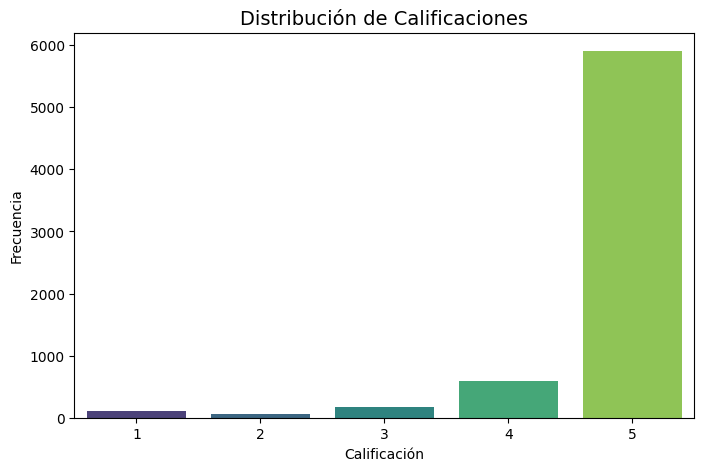


Número de comentarios por marca:
marca
Samsung    3276
Apple      2630
Xiaomi      916
Name: count, dtype: int64

Número de comentarios por modelo:
modelo
iPhone 11 128 GB 4GB RAM                              1570
Samsung S24 Ultra 256GB 12GB                          1348
SAMSUNG GALAXY A55                                     641
iPhone 14 128GB 5G 6GB RAM                             567
Samsung A15 256GB                                      528
iPhone 13 128 GB 5G 4GB RAM                            321
Xiaomi Redmi Note 13 8GB 256GB                         305
Samsung Galaxy A35 5G 256GB 8GB RAM                    295
Xiaomi Redmi Note 13 Pro 4g 256gb 8gb Ram              248
Samsung Galaxy A25 5G 256GB 8RAM                       238
Samsung Galaxy S24 Ultra 512GB 12GB                    211
iPhone 15 128GB 5G 6GB RAM                             172
Xiaomi Poco X6 Pro 5G 512Gb 12Ram 64Mp                 136
Xiaomi Redmi Note 13 Pro Plus 5G 512Gb 12Ram 200Mp     128
XIAOMI REDMI 13C 2

In [76]:

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Frecuencia de palabras
def calcular_frecuencia_palabras(df, columna):
    # Unir todos los comentarios en un solo texto
    texto = ' '.join(df[columna])
    # Tokenizar el texto en palabras
    palabras = texto.split()
    # Contar las palabras
    frecuencia = Counter(palabras)
    return frecuencia.most_common(10)  # Las 10 palabras más comunes

# Calcular frecuencia de palabras en comentario_limpio
frecuencia_palabras = calcular_frecuencia_palabras(df_prueba, 'comentario_limpio')
print("Palabras más comunes:")
for palabra, freq in frecuencia_palabras:
    print(f"{palabra}: {freq}")

# 2. Longitud promedio de los comentarios
df_prueba['longitud'] = df_prueba['comentario_limpio'].apply(lambda x: len(x.split()))
longitud_promedio = df_prueba['longitud'].mean()
print(f"\nLongitud promedio de los comentarios: {longitud_promedio:.2f} palabras")

# 3. Distribución de calificaciones (si existe una columna de calificación)
if 'calificacion' in df_prueba.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='calificacion', data=df_prueba, palette='viridis')
    plt.title("Distribución de Calificaciones", fontsize=14)
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.show()

# 4. Número de comentarios por marca o modelo
if 'marca' in df_prueba.columns and 'modelo' in df_prueba.columns:
    comentarios_por_marca = df_prueba['marca'].value_counts()
    comentarios_por_modelo = df_prueba['modelo'].value_counts()

    print("\nNúmero de comentarios por marca:")
    print(comentarios_por_marca)

    print("\nNúmero de comentarios por modelo:")
    print(comentarios_por_modelo)




Análsiis básico por marca


Palabras más comunes por marca:

Apple:
muy: 726
excelente: 670
producto: 584
calidad: 566
buena: 446
tamaño: 370
buen: 345
igual: 324
foto: 324
no: 294

Samsung:
muy: 1470
no: 786
camara: 747
compre: 719
excelente: 619
telefono: 551
producto: 545
hace: 490
buena: 487
samsung: 463

Xiaomi:
calidad: 270
buena: 240
muy: 238
excelente: 204
producto: 175
foto: 144
igual: 116
no: 112
celular: 111
buen: 110

Longitud promedio de comentarios por marca:
marca
Apple       6.845627
Samsung    12.307998
Xiaomi      6.715066
Name: longitud, dtype: float64

Calificación media por marca:
marca
Apple      4.794297
Samsung    4.788156
Xiaomi     4.688865
Name: calificacion, dtype: float64

Porcentaje de reviews en cada calificación por marca:
marca    marca    calificacion
Apple    Apple    1                1.939163
                  2                0.342205
                  3                2.167300
                  4                7.452471
                  5               88.098859
Samsung  Sa

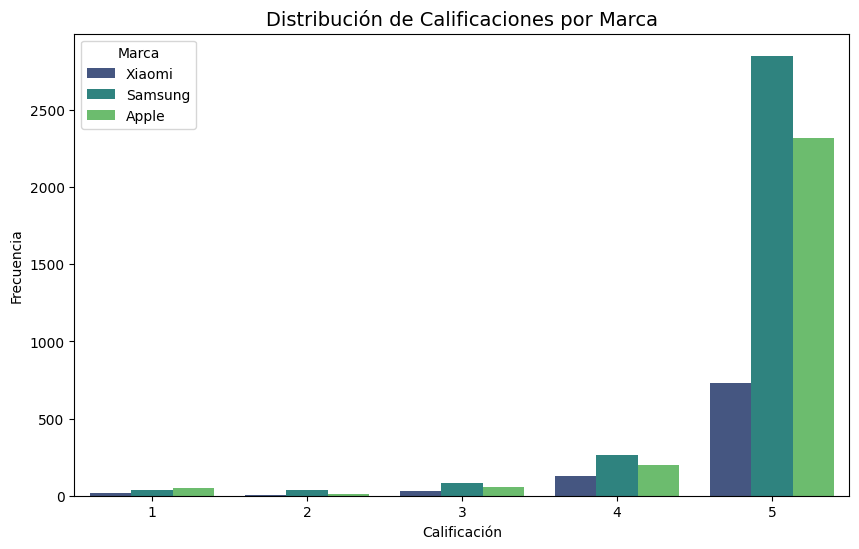

In [78]:
# 1. Frecuencia de palabras por marca
def calcular_frecuencia_por_marca(df, columna, grupo_columna):
    # Agrupar por marca y calcular la frecuencia de palabras
    frecuencia_por_marca = df.groupby(grupo_columna)[columna].apply(lambda x: ' '.join(x)).apply(lambda texto: Counter(texto.split()))
    return frecuencia_por_marca

frecuencia_palabras_por_marca = calcular_frecuencia_por_marca(df_prueba, 'comentario_limpio', 'marca')
print("\nPalabras más comunes por marca:")
for marca, frecuencia in frecuencia_palabras_por_marca.items():
    print(f"\n{marca}:")
    for palabra, freq in frecuencia.most_common(10):
        print(f"{palabra}: {freq}")

# 2. Longitud promedio de comentarios por marca
longitud_promedio_por_marca = df_prueba.groupby('marca')['longitud'].mean()
print("\nLongitud promedio de comentarios por marca:")
print(longitud_promedio_por_marca)

# 3. Calificación media por marca
if 'calificacion' in df_prueba.columns:
    calificacion_media_por_marca = df_prueba.groupby('marca')['calificacion'].mean()
    print("\nCalificación media por marca:")
    print(calificacion_media_por_marca)

    # 4. Porcentaje de reviews en cada calificación por marca
    porcentaje_calificaciones_por_marca = (
        df_prueba.groupby(['marca', 'calificacion']).size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
    )
    print("\nPorcentaje de reviews en cada calificación por marca:")
    print(porcentaje_calificaciones_por_marca)

# 5. Distribución gráfica de calificaciones por marca
if 'calificacion' in df_prueba.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='calificacion', data=df_prueba, hue='marca', palette='viridis')
    plt.title("Distribución de Calificaciones por Marca", fontsize=14)
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.legend(title="Marca")
    plt.show()




Análsis Básico por modelo


Palabras más comunes por modelo:

SAMSUNG GALAXY A55:
muy: 337
camara: 160
no: 139
buena: 130
excelente: 126
buen: 115
compre: 113
producto: 112
telefono: 110
calidad: 106

Samsung A15 256GB:
muy: 256
compre: 211
hace: 137
producto: 123
no: 116
celular: 110
equipo: 101
excelente: 93
buena: 90
buen: 81

Samsung Galaxy A05S 128Gb:
precio: 5
si: 4
no: 4
ideal: 4
encanto: 4
telefono: 3
muy: 3
bastante: 3
pantalla: 3
acorde: 3

Samsung Galaxy A25 5G 256GB 8RAM:
muy: 120
compre: 77
no: 77
celular: 49
samsung: 48
buen: 48
producto: 45
hace: 39
buena: 38
excelente: 38

Samsung Galaxy A35 5G 256GB 8GB RAM:
muy: 128
no: 102
compre: 98
excelente: 88
producto: 86
camara: 66
equipo: 60
hace: 60
dia: 56
bateria: 56

Samsung Galaxy S24 Ultra 512GB 12GB:
muy: 93
excelente: 65
no: 63
camara: 49
celular: 43
mejor: 43
bateria: 38
producto: 38
equipo: 37
s: 34

Samsung S24 Ultra 256GB 12GB:
muy: 533
camara: 362
telefono: 310
no: 285
s: 284
mejor: 251
ultra: 222
excelente: 206
samsung: 204
compre: 191

XI

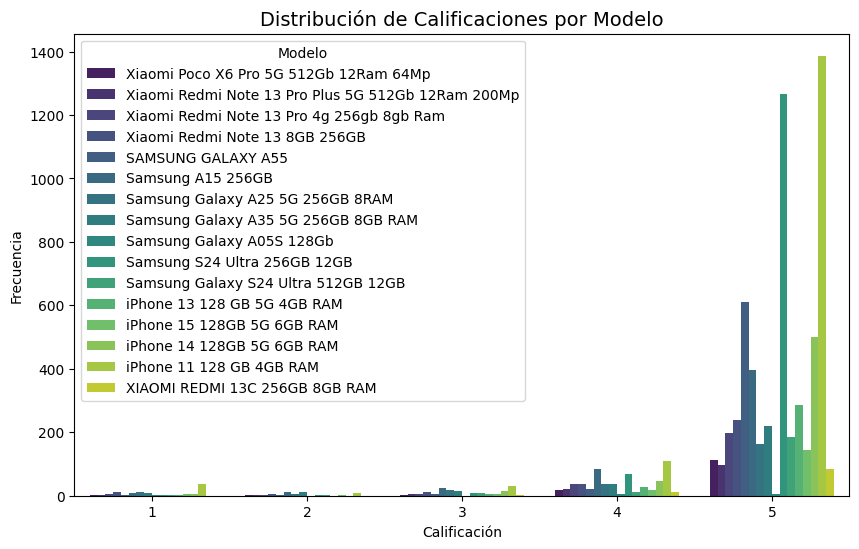

In [79]:
# 1. Frecuencia de palabras por modelo
def calcular_frecuencia_por_modelo(df, columna, grupo_columna):
    # Agrupar por modelo y calcular la frecuencia de palabras
    frecuencia_por_modelo = df.groupby(grupo_columna)[columna].apply(lambda x: ' '.join(x)).apply(lambda texto: Counter(texto.split()))
    return frecuencia_por_modelo

frecuencia_palabras_por_modelo = calcular_frecuencia_por_modelo(df_prueba, 'comentario_limpio', 'modelo')
print("\nPalabras más comunes por modelo:")
for modelo, frecuencia in frecuencia_palabras_por_modelo.items():
    print(f"\n{modelo}:")
    for palabra, freq in frecuencia.most_common(10):
        print(f"{palabra}: {freq}")

# 2. Longitud promedio de comentarios por modelo
longitud_promedio_por_modelo = df_prueba.groupby('modelo')['longitud'].mean()
print("\nLongitud promedio de comentarios por modelo:")
print(longitud_promedio_por_modelo)

# 3. Calificación media por modelo
if 'calificacion' in df_prueba.columns:
    calificacion_media_por_modelo = df_prueba.groupby('modelo')['calificacion'].mean()
    print("\nCalificación media por modelo:")
    print(calificacion_media_por_modelo)

    # 4. Porcentaje de reviews en cada calificación por modelo
    porcentaje_calificaciones_por_modelo = (
        df_prueba.groupby(['modelo', 'calificacion']).size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
    )
    print("\nPorcentaje de reviews en cada calificación por modelo:")
    print(porcentaje_calificaciones_por_modelo)

# 5. Distribución gráfica de calificaciones por modelo
if 'calificacion' in df_prueba.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='calificacion', data=df_prueba, hue='modelo', palette='viridis')
    plt.title("Distribución de Calificaciones por Modelo", fontsize=14)
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.legend(title="Modelo")
    plt.show()
